In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Dataset Overview:")
print('*'*50)
print(customers.info())
print('*'*50)
print('*'*50)
print(customers.describe())

Customers Dataset Overview:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
**************************************************
**************************************************
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [4]:
print("Products Dataset Overview:")
print('*'*50)
print(products.info())
print('*'*50)
print('*'*50)
print(products.describe())

Products Dataset Overview:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
**************************************************
**************************************************
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [5]:
print("Transactions Dataset Overview:")
print('*'*50)
print(transactions.info())
print('*'*50)
print('*'*50)
print(transactions.describe())

Transactions Dataset Overview:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
**************************************************
**************************************************
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%      

## Step 1: Exploratory Data Analysis (EDA)

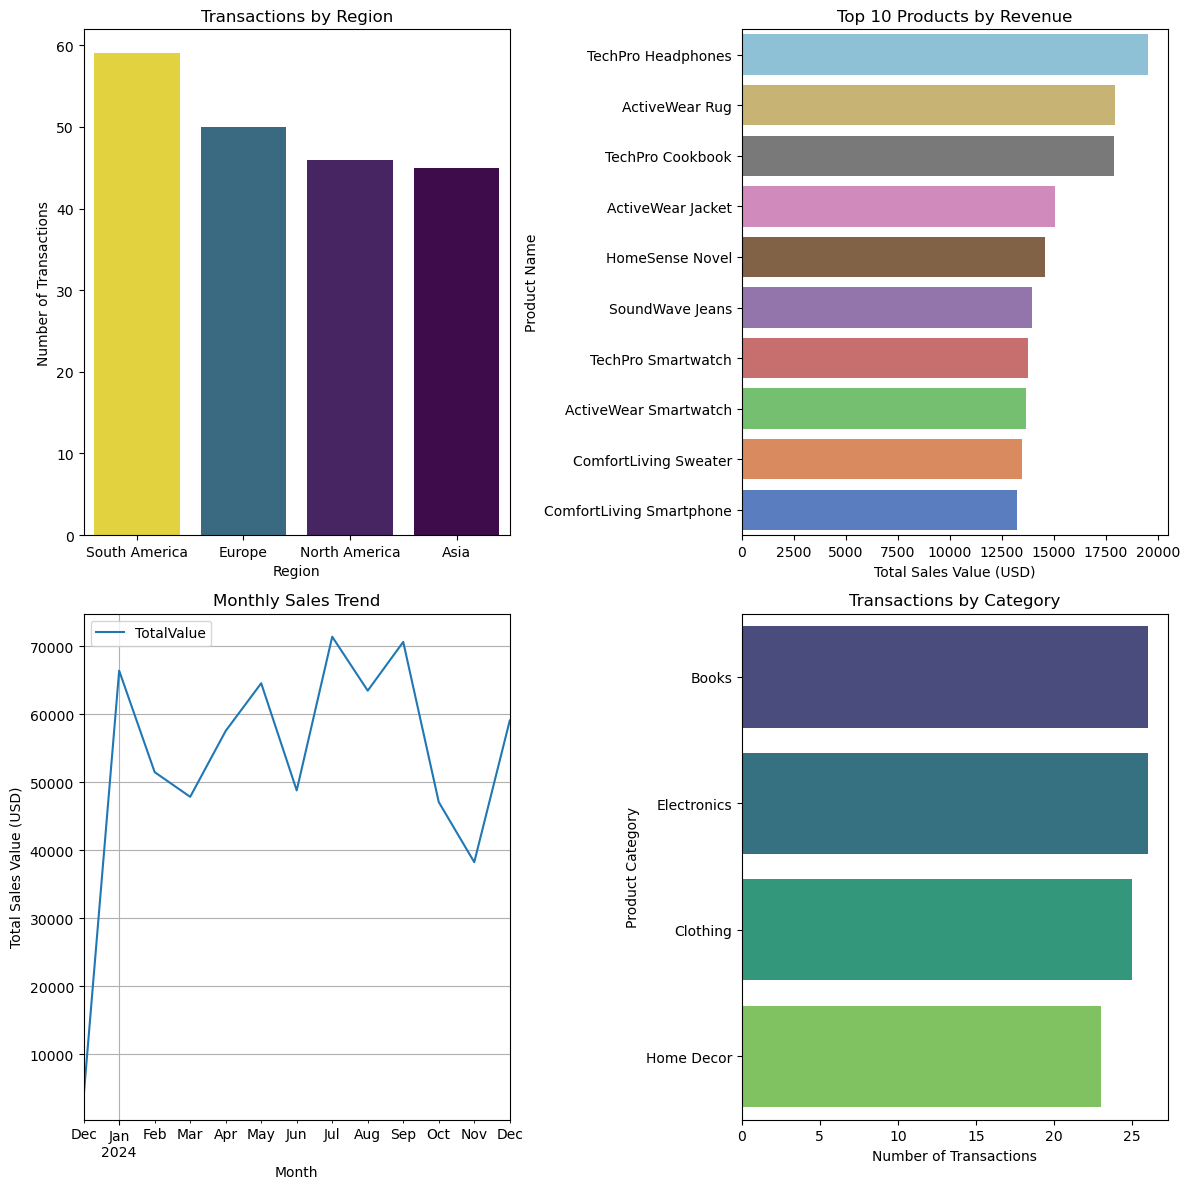

In [7]:
# 1. Prepare data for visualizations
customer_region_counts = customers['Region'].value_counts()
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month').agg({'TotalValue': 'sum'})
category_counts = products['Category'].value_counts()

# 2. Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot 1: Distribution of transactions across regions
sns.barplot(ax=axes[0, 0], x=customer_region_counts.index, y=customer_region_counts.values, palette='viridis', hue=customer_region_counts.values, legend=False)
axes[0, 0].set_title('Transactions by Region', fontsize=12)
axes[0, 0].set_xlabel('Region', fontsize=10)
axes[0, 0].set_ylabel('Number of Transactions', fontsize=10)

# Plot 2: Analyze product trends
top_products = transactions.groupby('ProductID').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False).head(10)
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID')
sns.barplot(ax=axes[0, 1], x='TotalValue', y='ProductName', hue=top_products['TotalValue'], data=top_products, palette='muted', legend=False)
axes[0, 1].set_title('Top 10 Products by Revenue', fontsize=12)
axes[0, 1].set_xlabel('Total Sales Value (USD)', fontsize=10)
axes[0, 1].set_ylabel('Product Name', fontsize=10)

print('\n')

# Plot 3: Monthly transaction analysis
monthly_sales.plot(ax=axes[1, 0], kind='line', title='Monthly Sales')
axes[1, 0].set_title('Monthly Sales Trend', fontsize=12)
axes[1, 0].set_xlabel('Month', fontsize=10)
axes[1, 0].set_ylabel('Total Sales Value (USD)', fontsize=10)
axes[1, 0].grid(True)

# Plot 4: Product category distribution in transactions
sns.barplot(ax=axes[1, 1], x=category_counts.values, y=category_counts.index, hue=category_counts.index, palette='viridis', legend=False)
axes[1, 1].set_title('Transactions by Category', fontsize=12)
axes[1, 1].set_ylabel('Product Category', fontsize=10)
axes[1, 1].set_xlabel('Number of Transactions', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis (EDA) and Business Insights

Plot 1: Transactions by Region  
This bar chart reveals the distribution of transactions across different regions. It helps identify which regions have higher or lower transaction volumes.  
Insights:  
You can see which regions contribute the most to your sales and focus your marketing efforts accordingly.
Regions with lower transaction volumes might require targeted campaigns or improved brand awareness initiatives.  

Plot 2: Top 10 Products by Revenue  
This bar chart showcases the top 10 products that generate the most revenue. It helps identify your best-selling products and understand customer preferences.  
Insights:  
You can prioritize promoting and stocking these top-selling products.
Consider upselling or cross-selling related products to customers who purchase these high-revenue items.  

Plot 3: Monthly Sales Trend  
This line plot depicts the trend of monthly sales over time. It helps visualize seasonal patterns or identify any significant changes in sales volume.  
Insights:  
You can identify peak sales months and plan inventory, staffing, or marketing campaigns accordingly.
Investigate any sudden drops or spikes in sales to understand the underlying reasons.  

Plot 4: Transactions by Category  
This bar chart shows the distribution of transactions across different product categories. It helps understand which categories are more popular among customers.  
Insights:  
You can focus on optimizing product assortments and promotions within high-demand categories.
Analyze categories with lower transaction volumes to see if there's potential for improvement or if they align with your overall product strategy.

#### Overall Insights:
By combining these visualizations, you can gain a comprehensive understanding of your customer base, product performance, and sales trends.   
This information can be valuable for making informed business decisions about marketing, inventory management, product development, and regional strategies.  


#### Busniess Insights:
Focus marketing efforts on high-performing regions (e.g., North America and Europe) while investigating low-performance regions to identify barriers.  

Develop promotional strategies around popular products and categories, especially during peak sales months.  

Use insights on regional spending power to craft targeted product offerings and pricing strategies.  

Consider increasing inventory for bestselling items and promoting underperforming categories through discounts or bundles.  

Regularly review seasonal trends and adjust marketing budgets to optimize for high-revenue months.